# Data Scraping using telegram

In [2]:
!pip install NLTK
!pip install textblob

In [3]:
!pip install telethon
!pip install nest_asyncio

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 702.2/702.2 kB 12.7 MB/s eta 0:00:00
  Created wheel for pyaes: filename=pyaes-1.6.1-py3-none-any.whl size=26346 sha256=a68cd4729dce4abf28819dbcad7fcbb8c769b8fe7c82fba7af7bddefc7f8acf7
  Stored in directory: /root/.cache/pip/wheels/d6/84/5f/ea6aef85a93c7e1922486369874f4740a5642d261e09c59140
Successfully built pyaes


In [4]:
import os
from telethon.sync import TelegramClient
import pandas as pd
from telethon.tl.functions.messages import GetHistoryRequest
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

api_id = "*********"
api_hash = "************"
phone = "**********"  # Replace with your phone number
channel_username = "@STOCKL"


# Remove locked session file if it exists
if os.path.exists("session_name.session"):
    os.remove("session_name.session")
    print("Locked session file removed.")

# Create a new session with a unique name
async def scrape_telegram_data():
    async with TelegramClient("new_session_name", api_id, api_hash) as client:
        print("Client connected!")
        # Add your scraping logic here
# Fetch the channel entity
        try:
            channel = await client.get_entity(channel_username)
        except Exception as e:
            print(f"Error fetching channel: {e}")
            return

        # Get the message history
        messages = []
        try:
            offset_id = 0  # Message offset for pagination
            limit = 100  # Number of messages to fetch per request
            total_count_limit = 1000  # Total messages to scrape

            while True:
                history = await client(GetHistoryRequest(
                    peer=channel,
                    offset_id=offset_id,
                    offset_date=None,
                    add_offset=0,
                    limit=limit,
                    max_id=0,
                    min_id=0,
                    hash=0
                ))

                if not history.messages:
                    break

                for message in history.messages:
                    if message.message:  # Ensure the message is not empty
                        messages.append({
                            "date": message.date,
                            "sender_id": message.from_id.user_id if message.from_id else None,
                            "message": message.message
                        })

                offset_id = history.messages[-1].id  # Update the offset for the next batch

                if len(messages) >= total_count_limit:
                    break

        except Exception as e:
            print(f"Error while fetching messages: {e}")

        # Save messages to a DataFrame
        df = pd.DataFrame(messages)
        print(f"Scraped {len(df)} messages.")

        # Save to CSV
        df.to_csv("telegram_messages.csv", index=False)
        print("Messages saved to telegram_messages.csv!")

# Run the function
import nest_asyncio
nest_asyncio.apply()
await scrape_telegram_data()




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Please enter your phone (or bot token): +91-6361142778


Please enter the code you received: 91264
Signed in successfully as Sushama Meenaga; remember to not break the ToS or you will risk an account ban!
Client connected!
Scraped 42 messages.
Messages saved to telegram_messages.csv!


In [5]:
import os
from telethon.sync import TelegramClient
import pandas as pd
from telethon.tl.functions.messages import GetHistoryRequest
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

api_id = "*********"
api_hash = "************"
phone = "**********"
channel_username = "@STOCKS"


# Remove locked session file if it exists
if os.path.exists("session_name.session"):
    os.remove("session_name.session")
    print("Locked session file removed.")

# Create a new session with a unique name
async def scrape_telegram_data():
    async with TelegramClient("new_session_name", api_id, api_hash) as client:
        print("Client connected!")

# Fetch the channel entity
        try:
            channel = await client.get_entity(channel_username)
        except Exception as e:
            print(f"Error fetching channel: {e}")
            return

        # Get the message history
        messages = []
        try:
            offset_id = 0  # Message offset for pagination
            limit = 100  # Number of messages to fetch per request
            total_count_limit = 1000  # Total messages to scrape

            while True:
                history = await client(GetHistoryRequest(
                    peer=channel,
                    offset_id=offset_id,
                    offset_date=None,
                    add_offset=0,
                    limit=limit,
                    max_id=0,
                    min_id=0,
                    hash=0
                ))

                if not history.messages:
                    break

                for message in history.messages:
                    if message.message:  # Ensure the message is not empty
                        messages.append({
                            "date": message.date,
                            "sender_id": message.from_id.user_id if message.from_id else None,
                            "message": message.message
                        })

                offset_id = history.messages[-1].id  # Update the offset for the next batch

                if len(messages) >= total_count_limit:
                    break

        except Exception as e:
            print(f"Error while fetching messages: {e}")

        # Save messages to a DataFrame
        df = pd.DataFrame(messages)
        print(f"Scraped {len(df)} messages.")

        # Save to CSV
        df.to_csv("telegram_messages1.csv", index=False)
        print("Messages saved to telegram_messages1.csv!")

# Run the function
import nest_asyncio
nest_asyncio.apply()
await scrape_telegram_data()




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Client connected!
Scraped 1001 messages.
Messages saved to telegram_messages1.csv!


In [6]:
import os
from telethon.sync import TelegramClient
import pandas as pd
from telethon.tl.functions.messages import GetHistoryRequest

api_id = "*********"
api_hash = "************"
phone = "**********"  # Replace with your phone number
channel_username = "@TRADING_KITE_ZERODHA_GROWW"


# Remove locked session file if it exists
if os.path.exists("session_name.session"):
    os.remove("session_name.session")
    print("Locked session file removed.")

# Create a new session with a unique name
async def scrape_telegram_data():
    async with TelegramClient("new_session_name", api_id, api_hash) as client:
        print("Client connected!")
        # Add your scraping logic here
# Fetch the channel entity
        try:
            channel = await client.get_entity(channel_username)
        except Exception as e:
            print(f"Error fetching channel: {e}")
            return

        # Get the message history
        messages = []
        try:
            offset_id = 0  # Message offset for pagination
            limit = 100  # Number of messages to fetch per request
            total_count_limit = 1000  # Total messages to scrape

            while True:
                history = await client(GetHistoryRequest(
                    peer=channel,
                    offset_id=offset_id,
                    offset_date=None,
                    add_offset=0,
                    limit=limit,
                    max_id=0,
                    min_id=0,
                    hash=0
                ))

                if not history.messages:
                    break

                for message in history.messages:
                    if message.message:  # Ensure the message is not empty
                        messages.append({
                            "date": message.date,
                            "sender_id": message.from_id.user_id if message.from_id else None,
                            "message": message.message
                        })

                offset_id = history.messages[-1].id  # Update the offset for the next batch

                if len(messages) >= total_count_limit:
                    break

        except Exception as e:
            print(f"Error while fetching messages: {e}")

        # Save messages to a DataFrame
        df = pd.DataFrame(messages)
        print(f"Scraped {len(df)} messages.")

        # Save to CSV
        df.to_csv("telegram_messages2.csv", index=False)
        print("Messages saved to telegram_messages2.csv!")

# Run the function
import nest_asyncio
nest_asyncio.apply()
await scrape_telegram_data()




Client connected!
Scraped 964 messages.
Messages saved to telegram_messages2.csv!


In [7]:
import os
from telethon.sync import TelegramClient
import pandas as pd
from telethon.tl.functions.messages import GetHistoryRequest

api_id = "*********"
api_hash = "************"
phone = "**********"  # Replace with your phone number
channel_username = "@SHARE_TRADING_TIPS_STOCK_MARKET"


# Remove locked session file if it exists
if os.path.exists("session_name.session"):
    os.remove("session_name.session")
    print("Locked session file removed.")

# Create a new session with a unique name
async def scrape_telegram_data():
    async with TelegramClient("new_session_name", api_id, api_hash) as client:
        print("Client connected!")
        # Add your scraping logic here
# Fetch the channel entity
        try:
            channel = await client.get_entity(channel_username)
        except Exception as e:
            print(f"Error fetching channel: {e}")
            return

        # Get the message history
        messages = []
        try:
            offset_id = 0  # Message offset for pagination
            limit = 100  # Number of messages to fetch per request
            total_count_limit = 1000  # Total messages to scrape

            while True:
                history = await client(GetHistoryRequest(
                    peer=channel,
                    offset_id=offset_id,
                    offset_date=None,
                    add_offset=0,
                    limit=limit,
                    max_id=0,
                    min_id=0,
                    hash=0
                ))

                if not history.messages:
                    break

                for message in history.messages:
                    if message.message:  # Ensure the message is not empty
                        messages.append({
                            "date": message.date,
                            "sender_id": message.from_id.user_id if message.from_id else None,
                            "message": message.message
                        })

                offset_id = history.messages[-1].id  # Update the offset for the next batch

                if len(messages) >= total_count_limit:
                    break

        except Exception as e:
            print(f"Error while fetching messages: {e}")

        # Save messages to a DataFrame
        df = pd.DataFrame(messages)
        print(f"Scraped {len(df)} messages.")

        # Save to CSV
        df.to_csv("telegram_messages3.csv", index=False)
        print("Messages saved to telegram_messages3.csv!")

# Run the function
import nest_asyncio
nest_asyncio.apply()
await scrape_telegram_data()

Client connected!
Scraped 53 messages.
Messages saved to telegram_messages3.csv!


In [8]:
import os
from telethon.sync import TelegramClient
import pandas as pd
from telethon.tl.functions.messages import GetHistoryRequest

api_id = "*********"
api_hash = "************"
phone = "**********"
channel_username = "@ZERO_TO_HERO_SR_STOCKS_NIFTY_50"


# Remove locked session file if it exists
if os.path.exists("session_name.session"):
    os.remove("session_name.session")
    print("Locked session file removed.")

# Create a new session with a unique name
async def scrape_telegram_data():
    async with TelegramClient("new_session_name", api_id, api_hash) as client:
        print("Client connected!")

# Fetch the channel entity
        try:
            channel = await client.get_entity(channel_username)
        except Exception as e:
            print(f"Error fetching channel: {e}")
            return

        # Get the message history
        messages = []
        try:
            offset_id = 0  # Message offset for pagination
            limit = 100  # Number of messages to fetch per request
            total_count_limit = 1000  # Total messages to scrape

            while True:
                history = await client(GetHistoryRequest(
                    peer=channel,
                    offset_id=offset_id,
                    offset_date=None,
                    add_offset=0,
                    limit=limit,
                    max_id=0,
                    min_id=0,
                    hash=0
                ))

                if not history.messages:
                    break

                for message in history.messages:
                    if message.message:  # Ensure the message is not empty
                        messages.append({
                            "date": message.date,
                            "sender_id": message.from_id.user_id if message.from_id else None,
                            "message": message.message
                        })

                offset_id = history.messages[-1].id  # Update the offset for the next batch

                if len(messages) >= total_count_limit:
                    break

        except Exception as e:
            print(f"Error while fetching messages: {e}")

        # Save messages to a DataFrame
        df = pd.DataFrame(messages)
        print(f"Scraped {len(df)} messages.")

        # Save to CSV
        df.to_csv("telegram_messages4.csv", index=False)
        print("Messages saved to telegram_messages4.csv!")

# Run the function
import nest_asyncio
nest_asyncio.apply()
await scrape_telegram_data()




Client connected!
Scraped 2 messages.
Messages saved to telegram_messages4.csv!


In [9]:
import os
from telethon.sync import TelegramClient
import pandas as pd
from telethon.tl.functions.messages import GetHistoryRequest

api_id = "*********"
api_hash = "************"
phone = "**********"
channel_username = "@CAPITALVIA"


# Remove locked session file if it exists
if os.path.exists("session_name.session"):
    os.remove("session_name.session")
    print("Locked session file removed.")

# Create a new session with a unique name
async def scrape_telegram_data():
    async with TelegramClient("new_session_name", api_id, api_hash) as client:
        print("Client connected!")

# Fetch the channel entity
        try:
            channel = await client.get_entity(channel_username)
        except Exception as e:
            print(f"Error fetching channel: {e}")
            return

        # Get the message history
        messages = []
        try:
            offset_id = 0  # Message offset for pagination
            limit = 100  # Number of messages to fetch per request
            total_count_limit = 1000  # Total messages to scrape

            while True:
                history = await client(GetHistoryRequest(
                    peer=channel,
                    offset_id=offset_id,
                    offset_date=None,
                    add_offset=0,
                    limit=limit,
                    max_id=0,
                    min_id=0,
                    hash=0
                ))

                if not history.messages:
                    break

                for message in history.messages:
                    if message.message:  # Ensure the message is not empty
                        messages.append({
                            "date": message.date,
                            "sender_id": message.from_id.user_id if message.from_id else None,
                            "message": message.message
                        })

                offset_id = history.messages[-1].id  # Update the offset for the next batch

                if len(messages) >= total_count_limit:
                    break

        except Exception as e:
            print(f"Error while fetching messages: {e}")

        # Save messages to a DataFrame
        df = pd.DataFrame(messages)
        print(f"Scraped {len(df)} messages.")

        # Save to CSV
        df.to_csv("telegram_messages5.csv", index=False)
        print("Messages saved to telegram_messages5.csv!")

# Run the function
import nest_asyncio
nest_asyncio.apply()
await scrape_telegram_data()

Client connected!
Scraped 687 messages.
Messages saved to telegram_messages5.csv!


In [10]:
import os
from telethon.sync import TelegramClient
import pandas as pd
from telethon.tl.functions.messages import GetHistoryRequest

api_id = "*********"
api_hash = "************"
phone = "**********"
channel_username = "@BHARTISHAREMARKET_IPO_STOCKS2"


# Remove locked session file if it exists
if os.path.exists("session_name.session"):
    os.remove("session_name.session")
    print("Locked session file removed.")

# Create a new session with a unique name
async def scrape_telegram_data():
    async with TelegramClient("new_session_name", api_id, api_hash) as client:
        print("Client connected!")

# Fetch the channel entity
        try:
            channel = await client.get_entity(channel_username)
        except Exception as e:
            print(f"Error fetching channel: {e}")
            return

        # Get the message history
        messages = []
        try:
            offset_id = 0  # Message offset for pagination
            limit = 100  # Number of messages to fetch per request
            total_count_limit = 1000  # Total messages to scrape

            while True:
                history = await client(GetHistoryRequest(
                    peer=channel,
                    offset_id=offset_id,
                    offset_date=None,
                    add_offset=0,
                    limit=limit,
                    max_id=0,
                    min_id=0,
                    hash=0
                ))

                if not history.messages:
                    break

                for message in history.messages:
                    if message.message:  # Ensure the message is not empty
                        messages.append({
                            "date": message.date,
                            "sender_id": message.from_id.user_id if message.from_id else None,
                            "message": message.message
                        })

                offset_id = history.messages[-1].id  # Update the offset for the next batch

                if len(messages) >= total_count_limit:
                    break

        except Exception as e:
            print(f"Error while fetching messages: {e}")

        # Save messages to a DataFrame
        df = pd.DataFrame(messages)
        print(f"Scraped {len(df)} messages.")

        # Save to CSV
        df.to_csv("telegram_messages6.csv", index=False)
        print("Messages saved to telegram_messages6.csv!")

# Run the function
import nest_asyncio
nest_asyncio.apply()
await scrape_telegram_data()



Client connected!
Scraped 613 messages.
Messages saved to telegram_messages6.csv!


In [11]:
import os
from telethon.sync import TelegramClient
import pandas as pd
from telethon.tl.functions.messages import GetHistoryRequest

api_id = "*********"
api_hash = "************"
phone = "**********"
channel_username = "@GUJRATI_TRADER_SR_STOCKS_TRADING"


# Remove locked session file if it exists
if os.path.exists("session_name.session"):
    os.remove("session_name.session")
    print("Locked session file removed.")

# Create a new session with a unique name
async def scrape_telegram_data():
    async with TelegramClient("new_session_name", api_id, api_hash) as client:
        print("Client connected!")

# Fetch the channel entity
        try:
            channel = await client.get_entity(channel_username)
        except Exception as e:
            print(f"Error fetching channel: {e}")
            return

        # Get the message history
        messages = []
        try:
            offset_id = 0  # Message offset for pagination
            limit = 100  # Number of messages to fetch per request
            total_count_limit = 1000  # Total messages to scrape

            while True:
                history = await client(GetHistoryRequest(
                    peer=channel,
                    offset_id=offset_id,
                    offset_date=None,
                    add_offset=0,
                    limit=limit,
                    max_id=0,
                    min_id=0,
                    hash=0
                ))

                if not history.messages:
                    break

                for message in history.messages:
                    if message.message:  # Ensure the message is not empty
                        messages.append({
                            "date": message.date,
                            "sender_id": message.from_id.user_id if message.from_id else None,
                            "message": message.message
                        })

                offset_id = history.messages[-1].id  # Update the offset for the next batch

                if len(messages) >= total_count_limit:
                    break

        except Exception as e:
            print(f"Error while fetching messages: {e}")

        # Save messages to a DataFrame
        df = pd.DataFrame(messages)
        print(f"Scraped {len(df)} messages.")

        # Save to CSV
        df.to_csv("telegram_messages7.csv", index=False)
        print("Messages saved to telegram_messages7.csv!")

# Run the function
import nest_asyncio
nest_asyncio.apply()
await scrape_telegram_data()



Client connected!
Scraped 1094 messages.
Messages saved to telegram_messages7.csv!


In [12]:
df_messages2 = pd.read_csv('/content/telegram_messages2.csv')
print(df_messages2.head())

                        date  sender_id  \
0  2024-11-26 08:31:00+00:00        NaN   
1  2024-11-26 08:30:59+00:00        NaN   
2  2024-11-17 09:18:50+00:00        NaN   
3  2024-11-17 09:18:50+00:00        NaN   
4  2024-11-17 09:18:41+00:00        NaN   

                                             message  
0  BANKNIFTY NIFTY CALLS \n               👇👇\nt.m...  
1  BANKNIFTY JACKPOT CALLS \n                  👇👇...  
2  BANKNIFTY NIFTY CALLS \n               👇👇\nt.m...  
3  BANKNIFTY JACKPOT CALLS \n                  👇👇...  
4  Key Points:\n\nThe current run in the S&P 500 ...  


In [13]:
df_messages3 = pd.read_csv('/content/telegram_messages3.csv')
print(df_messages3.head())

                        date  sender_id  \
0  2024-12-05 02:36:07+00:00        NaN   
1  2024-12-05 02:36:07+00:00        NaN   
2  2024-12-04 06:13:20+00:00        NaN   
3  2024-12-04 06:13:20+00:00        NaN   
4  2024-12-04 06:13:13+00:00        NaN   

                                             message  
0  BANKNIFTY NIFTY CALLS \n               👇👇\nt.m...  
1  BANKNIFTY JACKPOT CALLS \n                  👇👇...  
2  BANKNIFTY NIFTY CALLS \n               👇👇\nt.m...  
3  BANKNIFTY JACKPOT CALLS \n                  👇👇...  
4  #CNBCTV18Market | Adani Energy in focus\n\ns s...  


In [14]:
df_messages4 = pd.read_csv('/content/telegram_messages4.csv')
print(df_messages4.head())

                        date   sender_id  \
0  2024-02-21 15:32:56+00:00  5180719695   
1  2024-02-21 14:45:55+00:00  5180719695   

                                             message  
0  #S094\n༄━━━━━━━━༄⭕༄━━━━━━━━༄\n  ༻        𝙋𝙍𝙀𝙈𝙄...  
1  यह id sell हो चुकी है जिस भाई को भी new I'd ले...  


In [15]:
df_messages5 = pd.read_csv('/content/telegram_messages5.csv')
print(df_messages5.head())

                        date  sender_id  \
0  2024-11-28 10:02:32+00:00        NaN   
1  2024-07-22 14:38:23+00:00        NaN   
2  2024-05-20 13:29:06+00:00        NaN   
3  2024-05-11 12:18:22+00:00        NaN   
4  2024-05-10 18:31:15+00:00        NaN   

                                             message  
0  Best Calendly Alternative:\n\nWe have an excit...  
1  Best Calendly Alternative:\n\nWe have an excit...  
2        https://www.youtube.com/watch?v=xqtnOmTj9o8  
3  #Nifty के सबसे मंहगे, सस्ते शेयर \n\nCostliest...  
4  Stocks that fell over 10% this week 👇\n\n• Son...  


In [16]:
df_messages6 = pd.read_csv('/content/telegram_messages6.csv')
print(df_messages6.head())

                        date  sender_id  \
0  2024-12-07 06:06:05+00:00        NaN   
1  2024-12-07 06:05:25+00:00        NaN   
2  2024-12-07 06:05:25+00:00        NaN   
3  2024-12-07 02:53:15+00:00        NaN   
4  2024-12-07 02:53:05+00:00        NaN   

                                             message  
0  𝐌𝐚𝐫𝐤𝐞𝐭𝐢𝐧𝐠 & 𝐦𝐮𝐭𝐮𝐚𝐥 𝐟𝐮𝐧𝐝 & 𝐂𝐑𝐘𝐏𝐓𝐎& 𝐁𝐢𝐭𝐜𝐨𝐢𝐧 )\n\...  
1  ☝️Loss Cover Plan Join....👆\n\n❤️ available seat👆  
2  𝗦𝗮𝗯𝗵𝗶 𝗜𝗻𝘃𝗲𝘀𝘁𝗲𝗿𝘀 𝗞𝗮 𝗣𝗮𝘆𝗺𝗲𝗻𝘁 𝗥𝗲𝘁𝘂𝗿𝗻 𝗛𝗼 𝗚𝘆𝗮 𝗛𝗮𝗶\n...  
3  𝐌𝐚𝐫𝐤𝐞𝐭𝐢𝐧𝐠 & 𝐦𝐮𝐭𝐮𝐚𝐥 𝐟𝐮𝐧𝐝 & 𝐂𝐑𝐘𝐏𝐓𝐎& 𝐁𝐢𝐭𝐜𝐨𝐢𝐧 )\n\...  
4  Good morning all Traders have a Profitable day ❤️  


In [17]:
df_messages7 = pd.read_csv('/content/telegram_messages7.csv')
print(df_messages7.head())

                        date  sender_id  \
0  2024-12-07 02:48:50+00:00        NaN   
1  2024-12-06 17:30:09+00:00        NaN   
2  2024-12-06 09:08:43+00:00        NaN   
3  2024-12-06 09:08:43+00:00        NaN   
4  2024-12-06 09:08:43+00:00        NaN   

                                             message  
0  🎇GOOD MORNING  TRADERS 🎇\n\n🎇👍 ENJOY YOUR  WEE...  
1  PAYMENT IS BEING SENT TO ALL ONE BY ONE \n\n⭐️...  
2                                               🔥🔥38  
3                            Safe trader book profit  
4                                               🔥🔥36  


In [18]:
df_messages = pd.read_csv('/content/telegram_messages.csv')
print(df_messages.head())

                        date  sender_id  \
0  2024-10-21 13:08:27+00:00        NaN   
1  2024-02-10 05:42:50+00:00        NaN   
2  2024-01-08 20:32:54+00:00        NaN   
3  2023-09-09 13:27:35+00:00        NaN   
4  2023-09-09 13:26:53+00:00        NaN   

                                             message  
0                                        Join @deals  
1                                        Join @deals  
2                                        Join @deals  
3      For Paid promotion\nContact: @Executive_Robot  
4  💃Want to get products from Amazon,Flipkart at ...  


In [19]:
df_messages1 = pd.read_csv('/content/telegram_messages1.csv')
print(df_messages1.head())

                        date  sender_id  \
0  2024-12-06 13:24:10+00:00        NaN   
1  2024-12-06 02:35:12+00:00        NaN   
2  2024-12-05 13:27:26+00:00        NaN   
3  2024-12-05 02:35:19+00:00        NaN   
4  2024-12-04 13:20:28+00:00        NaN   

                                             message  
0  🇺🇸 CFTC to Monitor Use of AI in Derivatives Ma...  
1  🇮🇳 Year-end rush: Market recovery from recent ...  
2  🇺🇸 Paris stock market rallies as Macron fights...  
3  🇮🇳 Stock Market LIVE Updates: GIFT Nifty signa...  
4  🇺🇸 This May Be The Most Expensive Stock Market...  


# Data Cleaning and Preprocessing

In [20]:
# Remove stopwords and preprocess text
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_words = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_words)

df_messages['cleaned_message'] = df_messages['message'].apply(preprocess_text)


In [21]:
# Remove stopwords and preprocess text
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_words = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_words)

df_messages1['cleaned_message'] = df_messages1['message'].apply(preprocess_text)

In [22]:
# Remove stopwords and preprocess text
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_words = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_words)

df_messages2['cleaned_message'] = df_messages2['message'].apply(preprocess_text)

In [23]:
# Remove stopwords and preprocess text
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_words = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_words)

df_messages3['cleaned_message'] = df_messages3['message'].apply(preprocess_text)

In [24]:
# Remove stopwords and preprocess text
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_words = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_words)

df_messages4['cleaned_message'] = df_messages4['message'].apply(preprocess_text)

In [25]:
# Remove stopwords and preprocess text
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_words = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_words)

df_messages5['cleaned_message'] = df_messages5['message'].apply(preprocess_text)

In [26]:
# Remove stopwords and preprocess text
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_words = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_words)

df_messages6['cleaned_message'] = df_messages6['message'].apply(preprocess_text)

In [27]:
# Remove stopwords and preprocess text
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_words = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_words)

df_messages7['cleaned_message'] = df_messages7['message'].apply(preprocess_text)

In [28]:
import pandas as pd


# List of all DataFrames to concatenate
dataframes = [df_messages, df_messages1,df_messages2,df_messages3,df_messages4,df_messages5,df_messages6,df_messages7]

# Concatenate all DataFrames
combo_df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows of the combined DataFrame
print(combo_df .head())

# Optionally, save the combined DataFrame to a CSV file
combo_df.to_csv('combo_messages.csv', index=False)

                        date  sender_id  \
0  2024-10-21 13:08:27+00:00        NaN   
1  2024-02-10 05:42:50+00:00        NaN   
2  2024-01-08 20:32:54+00:00        NaN   
3  2023-09-09 13:27:35+00:00        NaN   
4  2023-09-09 13:26:53+00:00        NaN   

                                             message  \
0                                        Join @deals   
1                                        Join @deals   
2                                        Join @deals   
3      For Paid promotion\nContact: @Executive_Robot   
4  💃Want to get products from Amazon,Flipkart at ...   

                                     cleaned_message  
0                                         join deals  
1                                         join deals  
2                                         join deals  
3                             paid promotion contact  
4  get products amazon flipkart cheap price save ...  


In [34]:
from textblob import TextBlob
import pandas as pd

def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity  # Returns a value between -1 (negative) and 1 (positive)

    # Determine sentiment category based on polarity
    if polarity > 0:
        sentiment_label = 'positive'
    elif polarity < 0:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'

    return polarity, sentiment_label

# Example DataFrame (replace this with your actual DataFrame)
# df_messages = pd.DataFrame({'cleaned_text': ["I love this product!", "This is terrible.", "It's okay."]})

# Apply the get_sentiment function to the cleaned_text column
combo_df[['sentiment_polarity', 'sentiment_label']] = combo_df['cleaned_message'].apply(get_sentiment).apply(pd.Series)

# Display the updated DataFrame
print(combo_df[['cleaned_message', 'sentiment_polarity', 'sentiment_label']].head())
combo_df.to_csv('combined_messages1.csv', index=False)

                                     cleaned_message  sentiment_polarity  \
0                                         join deals            0.000000   
1                                         join deals            0.000000   
2                                         join deals            0.000000   
3                             paid promotion contact            0.000000   
4  get products amazon flipkart cheap price save ...            0.383333   

  sentiment_label  
0         neutral  
1         neutral  
2         neutral  
3         neutral  
4        positive  


In [35]:
combo_df.shape

(4456, 7)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [53]:
# Create features and target
X = combo_df['cleaned_message'] # Add more features as required
y = combo_df['sentiment_label'].values

In [54]:
# Convert text data into numerical format using CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

In [55]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [57]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier()

}

In [58]:
# Train models and evaluate performance
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Model: Logistic Regression
Accuracy: 0.9540358744394619
              precision    recall  f1-score   support

    negative       0.79      0.41      0.54        27
     neutral       0.96      0.99      0.97       610
    positive       0.94      0.93      0.94       255

    accuracy                           0.95       892
   macro avg       0.90      0.78      0.82       892
weighted avg       0.95      0.95      0.95       892

--------------------------------------------------
Model: SVM
Accuracy: 0.9461883408071748
              precision    recall  f1-score   support

    negative       0.86      0.22      0.35        27
     neutral       0.96      0.99      0.97       610
    positive       0.92      0.93      0.92       255

    accuracy                           0.95       892
   macro avg       0.91      0.71      0.75       892
weighted avg       0.94      0.95      0.94       892

--------------------------------------------------
Model: Decision Tree
Accuracy: 0.9551569

[Text(0.8942351339083069, 0.9932432432432432, 'top <= 0.5\ngini = 0.454\nsamples = 3564\nvalue = [98, 2410, 1056]\nclass = neutral'),
 Text(0.8211529732183386, 0.9797297297297297, 'market <= 0.5\ngini = 0.3\nsamples = 2928\nvalue = [86, 2410, 432]\nclass = neutral'),
 Text(0.8576940535633227, 0.9864864864864864, 'True  '),
 Text(0.7694053563322741, 0.9662162162162162, 'near <= 0.5\ngini = 0.26\nsamples = 2805\nvalue = [77, 2388, 340]\nclass = neutral'),
 Text(0.7621425329096686, 0.9527027027027027, 'first <= 0.5\ngini = 0.237\nsamples = 2756\nvalue = [77, 2388, 291]\nclass = neutral'),
 Text(0.7548797094870631, 0.9391891891891891, 'good <= 0.5\ngini = 0.219\nsamples = 2719\nvalue = [77, 2388, 254]\nclass = neutral'),
 Text(0.7349069450748978, 0.9256756756756757, 'slot <= 0.5\ngini = 0.202\nsamples = 2686\nvalue = [76, 2388, 222]\nclass = neutral'),
 Text(0.716749886518384, 0.9121621621621622, 'new <= 0.5\ngini = 0.187\nsamples = 2657\nvalue = [76.0, 2386.0, 195.0]\nclass = neutral'),
 

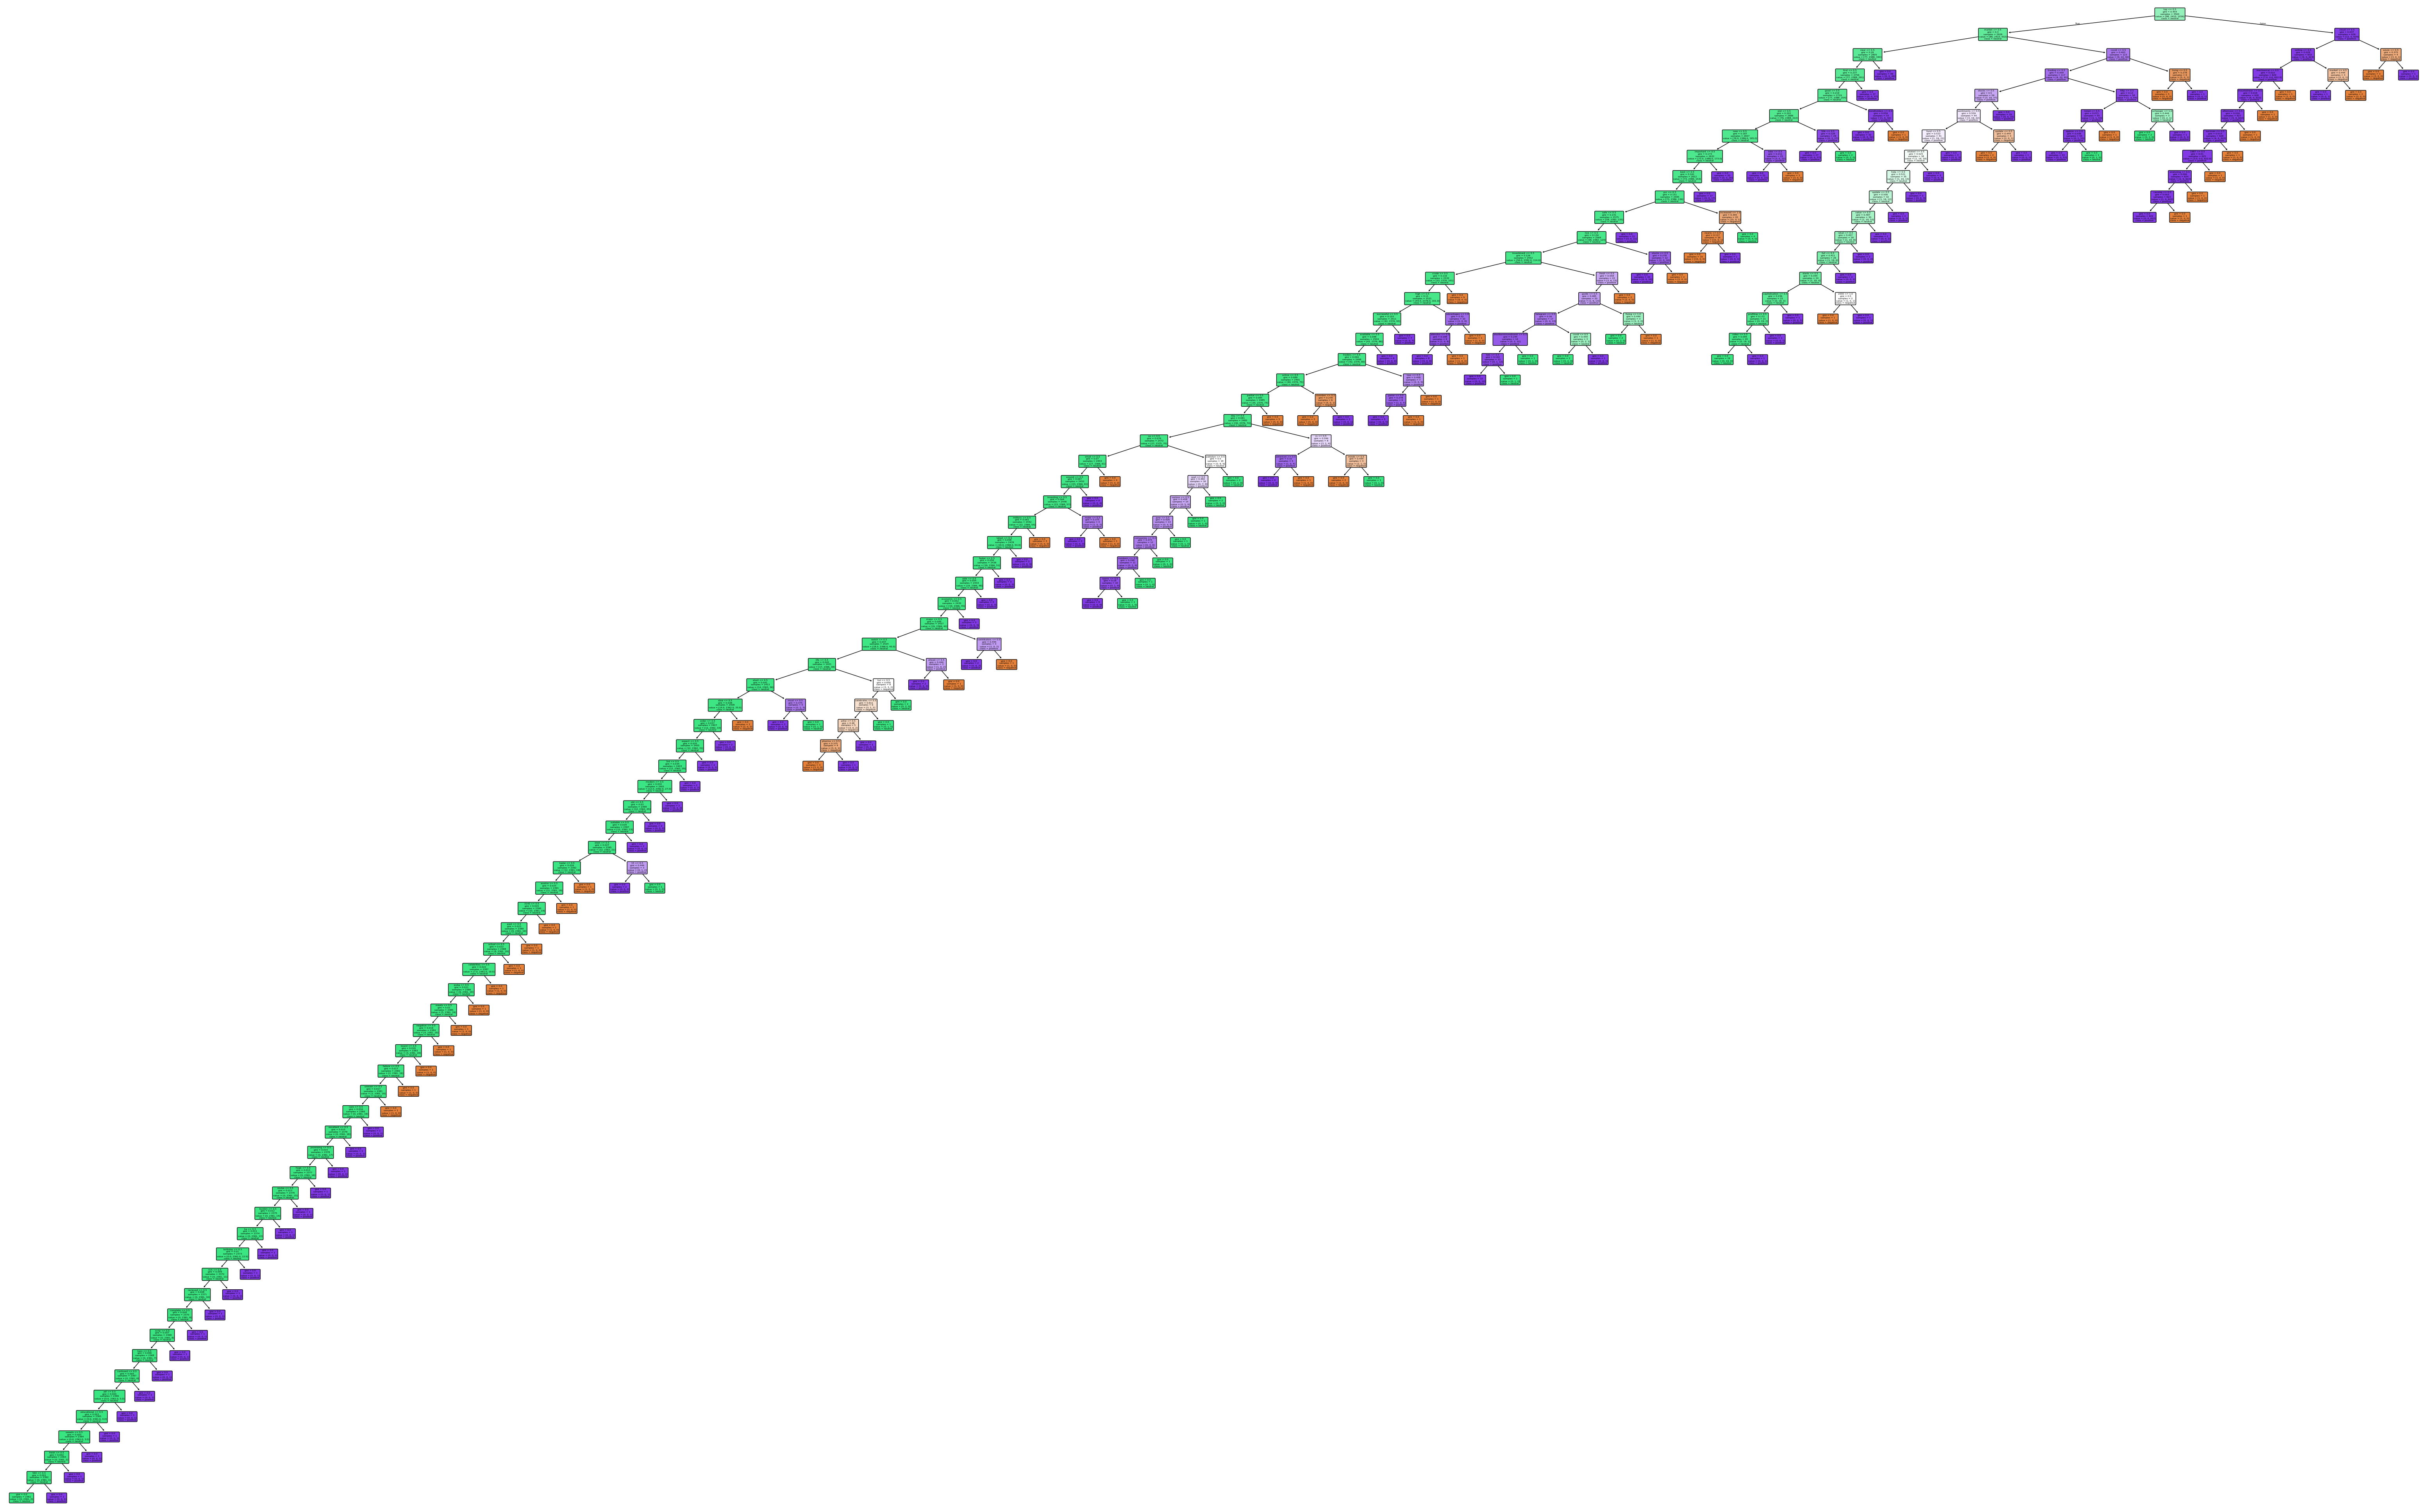

In [61]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams

# Get the Decision Tree model from your 'models' dictionary
decision_tree_model = models['Decision Tree']

# Set figure size
rcParams['figure.figsize'] = 80, 50

# Plot the decision tree
plot_tree(decision_tree_model,
          feature_names=vectorizer.get_feature_names_out(),  # Add feature names for better readability
          class_names=decision_tree_model.classes_,  # Add class names for better readability
          filled=True, rounded=True)

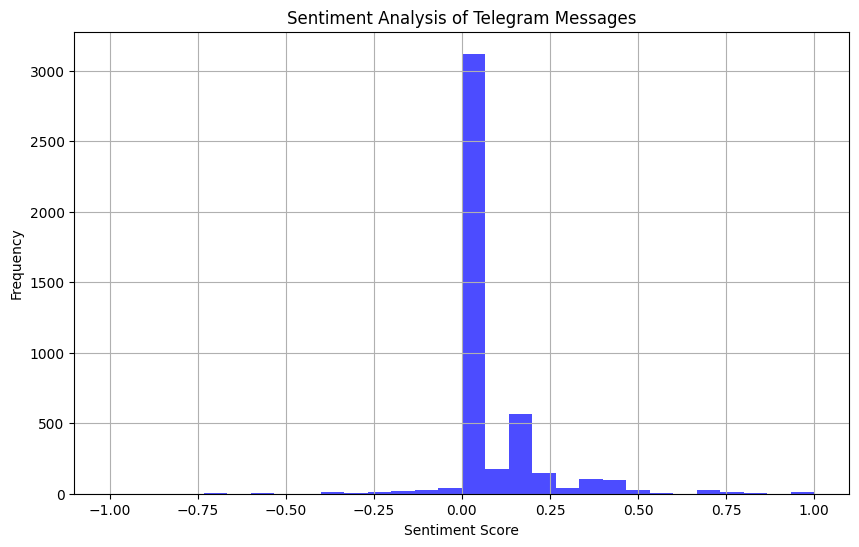

           date  sentiment
0    2020-06-16   0.000000
1    2020-06-17   0.700000
2    2020-06-22   0.466667
3    2020-06-23   0.184524
4    2020-06-24   0.087882
..          ...        ...
711  2024-12-03   0.048562
712  2024-12-04   0.042190
713  2024-12-05   0.039434
714  2024-12-06   0.048681
715  2024-12-07   0.250000

[716 rows x 2 columns]


<Figure size 8000x5000 with 0 Axes>

In [64]:
import matplotlib.pyplot as plt

# Plotting the sentiment distribution
plt.figure(figsize=(10, 6))
plt.hist(combo_df['sentiment'], bins=30, color='blue', alpha=0.7)
plt.title('Sentiment Analysis of Telegram Messages')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Example of summarizing sentiment by date if needed
combo_df['date'] = pd.to_datetime(combo_df['date']).dt.date
daily_sentiment = combo_df.groupby('date')['sentiment'].mean().reset_index()
print(daily_sentiment)
plt.savefig('sentimental analysis.png')
plt.show()

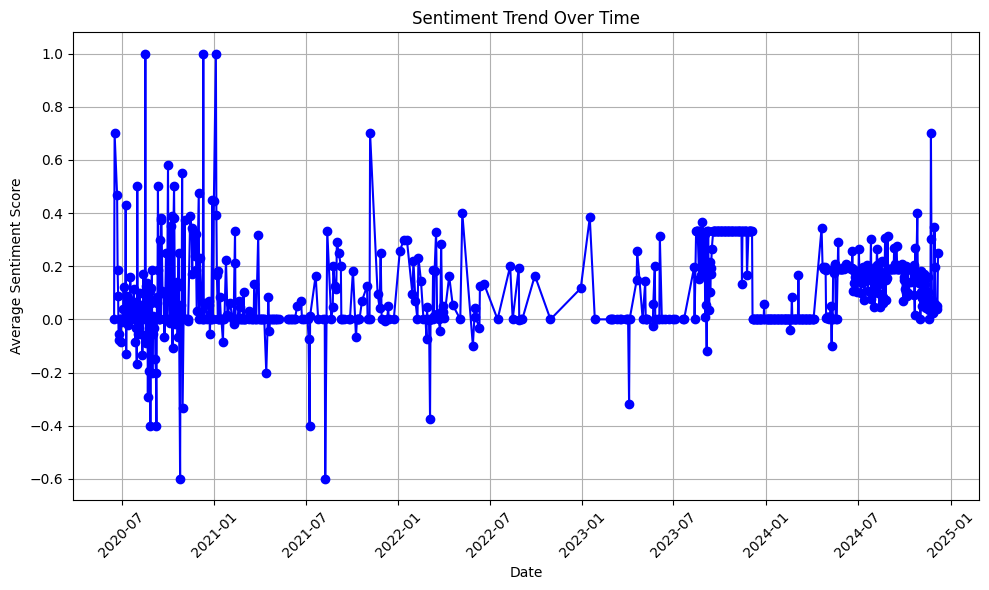

In [65]:
# Plotting the sentiment trend over time
plt.figure(figsize=(10, 6))
plt.plot(daily_sentiment['date'], daily_sentiment['sentiment'], marker='o', linestyle='-', color='blue')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig('sentiment_trend_over_time.png')

# Show the plot
plt.show()

Incorporate Word Frequency (Stock Mentions)

In [66]:
stock_keywords = ['AAPL', 'TSLA', 'AMZN', 'MSFT', 'GOOGL','NIFTY50','SENSEX','NVIDIA','YAHOO','NASDAQ','BITCOIN']

# Add columns to count the frequency of each keyword in messages
for keyword in stock_keywords:
   combo_df[f'{keyword}_mentions'] = combo_df['cleaned_message'].apply(lambda x: x.lower().split().count(keyword.lower()))

# Sum the total mentions of all stock keywords
combo_df['total_stock_mentions'] = combo_df[[f'{keyword}_mentions' for keyword in stock_keywords]].sum(axis=1)

**Adding** Time-Series Features bold text

In [67]:
# Convert the date column to datetime
combo_df['date'] = pd.to_datetime(combo_df['date'])

# Aggregate sentiment and stock mentions over time
time_series_features = combo_df.resample('D', on='date').agg({
    'sentiment': 'mean',               # Average sentiment per day
    'total_stock_mentions': 'sum'     # Total stock mentions per day
}).reset_index()

# Add rolling features (e.g., rolling average sentiment over the past 3 days)
time_series_features['rolling_sentiment'] = time_series_features['sentiment'].rolling(window=3).mean().fillna(0)
time_series_features['rolling_mentions'] = time_series_features['total_stock_mentions'].rolling(window=3).sum().fillna(0)


# Model Enhancement with LSTM

Data Preparation for LSTM

In [68]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Scale features for LSTM input
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(time_series_features[['rolling_sentiment', 'rolling_mentions']])

# Create sequences for LSTM
sequence_length = 5  # Number of days to consider for prediction
X = []
y = []

for i in range(len(scaled_features) - sequence_length):
    X.append(scaled_features[i:i + sequence_length])
    y.append(scaled_features[i + sequence_length][0])  # Predicting sentiment as a proxy for stock movement

X = np.array(X)
y = np.array(y)


Build the LSTM model

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build LSTM model
model = Sequential([
    LSTM(64, input_shape=(X.shape[1], X.shape[2]), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')  # Regression for predicting sentiment
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the LSTM model
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2, shuffle=False)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 64)                  │          17,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,265 (75.25 KB)

 Trainable params: 19,265 (75.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0749 - val_loss: 0.0102
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - val_loss: 0.0101
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - val_loss: 0.0120
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - val_loss: 0.0129
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - val_loss: 0.0128
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0101 - val_loss: 0.0138
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0101 - val_loss: 0.0156
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - val_loss: 0.0171
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - val_loss: 0.0191
Epoch 10/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0094 - val_loss: 0.0173
Epoch 11/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0094 - val_loss: 0.0169
Epoch 12/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0093 - val_l

the training loss starts at 0.0749 in the first epoch and decreases steadily, reaching 0.0075 in the 20th epoch. This shows the model is learning to minimize the error on the training set.

the validation loss is 0.0102 and fluctuates across epochs. By the 20th epoch, it reduces to 0.0123, showing that the model is improving its ability to predict on validation data, albeit with some fluctuation.



# Evaluate the LSTM Model

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


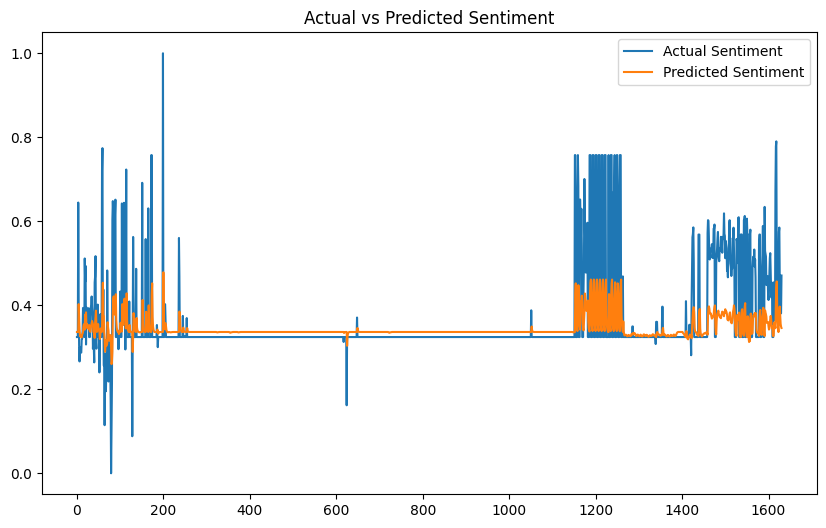

In [72]:
import matplotlib.pyplot as plt

# Predict on the training data
y_pred = model.predict(X)

# Plot actual vs predicted sentiment
plt.figure(figsize=(10, 6))
plt.plot(y, label='Actual Sentiment')
plt.plot(y_pred, label='Predicted Sentiment')
plt.legend()
plt.title('Actual vs Predicted Sentiment')
plt.show()


training loss consistently decreases, but validation loss initially decreases and later fluctuates slightly (e.g., between epochs 7-18), possibly indicating overfitting or data variability.

Manually experimenting by adjusting sequence length,LSTM layers and neurons with an addition of dropout and learning rates

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Manual experimentation with different hyperparameters
sequence_lengths = [3, 5, 7]
dropout_rates = [0.2, 0.3, 0.4]
neurons = [32, 64, 128]

best_model = None
best_loss = float('inf')

for seq_len in sequence_lengths:
    for dropout_rate in dropout_rates:
        for neuron_count in neurons:
            # Build the LSTM model
            model = Sequential([
                LSTM(neuron_count, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
                Dropout(dropout_rate),
                Dense(neuron_count // 2, activation='relu'),
                Dropout(dropout_rate),
                Dense(1, activation='linear')
            ])

            model.compile(optimizer='adam', loss='mean_squared_error')
            model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

            # Evaluate the model
            y_pred = model.predict(X_test)
            loss = mean_squared_error(y_test, y_pred)
            print(f"Seq Len: {seq_len}, Neurons: {neuron_count}, Dropout: {dropout_rate}, Loss: {loss}")

            if loss < best_loss:
                best_loss = loss
                best_model = model

print(f"Best Loss: {best_loss}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Seq Len: 3, Neurons: 32, Dropout: 0.2, Loss: 0.007249105484488389


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Seq Len: 3, Neurons: 64, Dropout: 0.2, Loss: 0.007271861456892533


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Seq Len: 3, Neurons: 128, Dropout: 0.2, Loss: 0.006834956521874586


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Seq Len: 3, Neurons: 32, Dropout: 0.3, Loss: 0.007736455548107574


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Seq Len: 3, Neurons: 64, Dropout: 0.3, Loss: 0.007548456926925354


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Seq Len: 3, Neurons: 128, Dropout: 0.3, Loss: 0.006757451342764458


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Seq Len: 3, Neurons: 32, Dropout: 0.4, Loss: 0.007621942137634771


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Seq Len: 3, Neurons: 64, Dropout: 0.4, Loss: 0.007337900083934415


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
Seq Len: 3, Neurons: 128, Dropout: 0.4, Loss: 0.007042217974450831


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Seq Len: 5, Neurons: 32, Dropout: 0.2, Loss: 0.0075337624371962335


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Seq Len: 5, Neurons: 64, Dropout: 0.2, Loss: 0.007198798304159832


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Seq Len: 5, Neurons: 128, Dropout: 0.2, Loss: 0.00704149471081293


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Seq Len: 5, Neurons: 32, Dropout: 0.3, Loss: 0.007918775913334482


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Seq Len: 5, Neurons: 64, Dropout: 0.3, Loss: 0.00724240325051977


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Seq Len: 5, Neurons: 128, Dropout: 0.3, Loss: 0.006815166087643196


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Seq Len: 5, Neurons: 32, Dropout: 0.4, Loss: 0.007812043370338794


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Seq Len: 5, Neurons: 64, Dropout: 0.4, Loss: 0.007294731775844015


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Seq Len: 5, Neurons: 128, Dropout: 0.4, Loss: 0.006815203289705703


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Seq Len: 7, Neurons: 32, Dropout: 0.2, Loss: 0.0076219232387477395


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Seq Len: 7, Neurons: 64, Dropout: 0.2, Loss: 0.007634233955430227


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Seq Len: 7, Neurons: 128, Dropout: 0.2, Loss: 0.007039815640323404


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Seq Len: 7, Neurons: 32, Dropout: 0.3, Loss: 0.007699405227680118


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Seq Len: 7, Neurons: 64, Dropout: 0.3, Loss: 0.007336175939162062


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Seq Len: 7, Neurons: 128, Dropout: 0.3, Loss: 0.006735610519716462


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Seq Len: 7, Neurons: 32, Dropout: 0.4, Loss: 0.007880689831426936


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Seq Len: 7, Neurons: 64, Dropout: 0.4, Loss: 0.007316638676385574


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Seq Len: 7, Neurons: 128, Dropout: 0.4, Loss: 0.006955072815751611
Best Loss: 0.006735610519716462


The loss with Seq Len: 3, Neurons: 128, Dropout: 0.2, the loss is 0.006834, which is among the best.

The combination of higher neurons (128) with lower dropout (0.2 or 0.3) seems to yield better results.

In [73]:
!pip install scikeras[tensorflow]

# Hyperparameter Tuning with GridSearchCV

Define a Model Builder Function

In [77]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

# Define a function to build the model
def build_model(neurons=64, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential([
        LSTM(neurons, input_shape=(X.shape[1], X.shape[2]), return_sequences=False),
        Dropout(dropout_rate),
        Dense(neurons // 2, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


Perform Grid Search

In [78]:
# Wrap the model for GridSearchCV
regressor = KerasRegressor(model=build_model, epochs=10, batch_size=32, verbose=0)

# Define parameter grid
param_grid = {
    'model__neurons': [32, 64, 128],
    'model__dropout_rate': [0.2, 0.3, 0.4],
    'batch_size': [16, 32],
    'epochs': [10, 20]
}

# Perform Grid Search
grid = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_result = grid.fit(X, y)

# Print the best parameters and results
print(f"Best Parameters: {grid_result.best_params_}")
print(f"Best Score: {grid_result.best_score_}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a l

Best Parameters: {'batch_size': 32, 'epochs': 10, 'model__dropout_rate': 0.3, 'model__neurons': 64}
Best Score: -0.007088333465431112


 Evaluate the Best Model

In [79]:
# Get the best model from GridSearchCV
best_model = grid_result.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of Best Model: {mse}")


Mean Squared Error of Best Model: 0.007008653566942775


A lower MSE reflects a high-performing model, as it signifies that the predictions are closer to the true values.

The model demonstrates a strong predictive capability, effectively minimizing the errors in its predictions.

This performance suggests that the model is well-suited for the given dataset and has been optimized effectively during hyperparameter tuning.

Using Transformers model

In [96]:
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
import torch
import torch.nn as nn
import torch.optim as optim

# Load pretrained tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)  # 3 for Positive, Neutral, Negative

# Define your dataset
class StockSentimentDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = tokenizer(
            self.texts[idx],
            truncation=True,
            padding='max_length',
            max_length=128,
            return_tensors='pt'
        )
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return {**encoding, 'labels': label}

# Example data
texts = ["Stock A is going up!", "Stock B looks bad", "Stock C is steady"]
labels = [2, 0, 1]  # 2 = Positive, 0 = Negative, 1 = Neutral
dataset = StockSentimentDataset(texts, labels)

# DataLoader for batching
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Define optimizer and loss function
optimizer = optim.AdamW(model.parameters(), lr=5e-5)
criterion = nn.CrossEntropyLoss()

# Fine-tuning the model
model.train()
epochs = 3

for epoch in range(epochs):
    total_loss = 0
    for batch in dataloader:
        optimizer.zero_grad()
        inputs = {
            'input_ids': batch['input_ids'].squeeze(1),
            'attention_mask': batch['attention_mask'].squeeze(1),
            'labels': batch['labels']
        }
        outputs = model(**inputs)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {total_loss:.4f}")

# Save the fine-tuned model
model.save_pretrained('./fine_tuned_bert')
tokenizer.save_pretrained('./fine_tuned_bert')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 2.4473
Epoch 2, Loss: 2.1041
Epoch 3, Loss: 1.8992


('./fine_tuned_bert/tokenizer_config.json',
 './fine_tuned_bert/special_tokens_map.json',
 './fine_tuned_bert/vocab.txt',
 './fine_tuned_bert/added_tokens.json')

The loss is decreasing across epochs, which indicates the model is learning from your data. However:

A loss of 1.8992 suggests that the model may still need more epochs to improve further.
Keep monitoring the loss and evaluation metrics (e.g., accuracy, precision, recall) to decide the optimal number of epochs.
Also need to consider adjusting the learning rate or using early stopping if the loss plateaus.








 Evaluate the Fine-Tuned Model

In [83]:
# Switch to evaluation mode
model.eval()

# Test the model with a new example
test_texts = ["Stock A is performing poorly", "Stock B is surging high!"]
test_encodings = tokenizer(
    test_texts,
    truncation=True,
    padding='max_length',
    max_length=128,
    return_tensors='pt'
)

# Inference
with torch.no_grad():
    outputs = model(input_ids=test_encodings['input_ids'], attention_mask=test_encodings['attention_mask'])
    predictions = torch.argmax(outputs.logits, dim=-1)

print("Predictions:", predictions.tolist())


Predictions: [2, 2]


The prediction [2, 2] implies that the model has classified both inputs as positive sentiment